In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Instruct_pix2pix

/content/drive/MyDrive/Instruct_pix2pix


In [ ]:
pwd

'/content/drive/MyDrive/Instruct_pix2pix'

# Setup

In [ ]:
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


caption_model_name = 'blip-large'  # ["blip-base", "blip-large", "git-large-coco"]
clip_model_name = 'ViT-L-14/openai'  # ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)


def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image) # 이미지를 특징 벡터로 변환

    # 이미지의 특징 벡터를 기반으로 다양한 항목들과의 유사도를 계산하여 상위 5개를 반환
    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    # 각 항목에 대해 해당 항목과 이미지의 유사도를 계산하여 딕셔너리 형태로 반환
    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}

    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks


def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)

# Batch process a directory of images

a pixeled image of a bird with a long beak, fearow, conjoined twins, subject= duck, by Ken Sugimori, unsettling image, cut-away, terrifying in its weirdness, recolored, hidden hands and faces, tripod, aliased, grown together


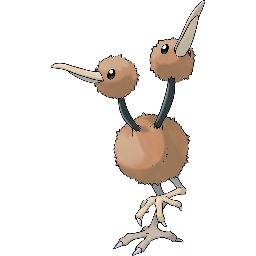

Generating prompts:  98%|█████████▊| 801/819 [4:54:26<06:13, 20.74s/it]

a cartoon picture of a bird with a hat and a cape, four faces in one creature, by Ken Sugimori, twelve arms, png, unsettling photo, very very unsettling, fearow, accurate depiction, gangly, nightmare inducing, dark surrealist, overlapping, pidgey, three heads, neat


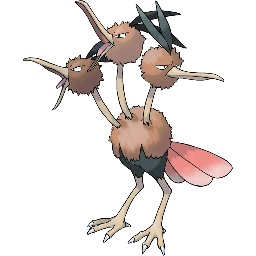

Generating prompts:  98%|█████████▊| 802/819 [4:54:54<06:28, 22.88s/it]

a cartoon white dog with a large nose and tail, bread type pokemon, drowning, fleshy creature above her mouth, walrus, exploitable image, transparent background, metal tail, lips slightly parted, as an atlantean, white cheeks, floating kelp, shorter neck, young child, wig


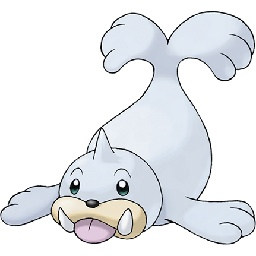

Generating prompts:  98%|█████████▊| 803/819 [4:55:20<06:21, 23.84s/it]

a white cat with a big tail and a big nose, long flowing hair underwater, by Ken Sugimori, the seal of fortune, necromorph, inspired by Brigette Barrager, labrador, 1820, pure white background, wavy water, 1 2 9 7, adorable design


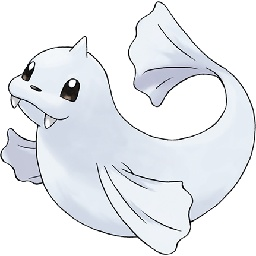

Generating prompts:  98%|█████████▊| 804/819 [4:55:41<05:44, 22.96s/it]

a cartoon picture of a purple creature with a big smile, covered in mud, by Ken Sugimori, slimy tongue, 2018, full - body artwork, covered in transparent cloth, grotty, skeumorphism, melting face, geomorphology


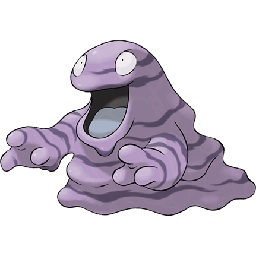

Generating prompts:  98%|█████████▊| 805/819 [4:56:00<05:05, 21.85s/it]

a cartoon image of a purple creature with its mouth open, melting into vulpix, gooey skin, 2018, by Sōami, folds, 6 june 1944, polluted, with a white background, covered with black goo, png, speculative evolution, large shell


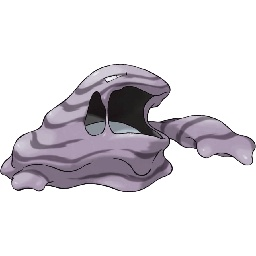

Generating prompts:  98%|█████████▊| 806/819 [4:56:25<04:56, 22.77s/it]

a pokemon character with a gun in his hand, blastoise, transparent background, post-war, background removed, 12mpx, 0


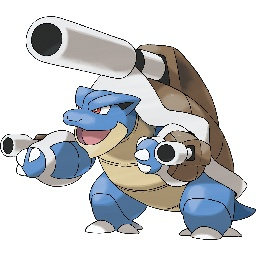

Generating prompts:  99%|█████████▊| 807/819 [4:56:40<04:07, 20.62s/it]

a cartoon turtle with a blue shell and white shell on its back, blastoise, uncompressed png, half-body portrait, with full descriptions, inspired by Dong Yuan, proportionally enormous arms, teapot, photoshopped, neck visible, turmoil


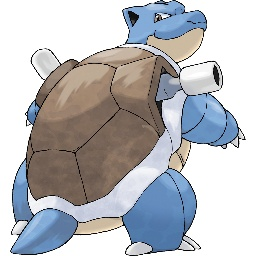

Generating prompts:  99%|█████████▊| 808/819 [4:57:00<03:42, 20.26s/it]

a cartoon image of a black and purple pokemon character with a tongue, in a horned helmet, transparent carapace, licking out, professional headshot, derpy, professional closeup photo, headless, veiled face, portrait of white teenage girl, cgcosiety, metal


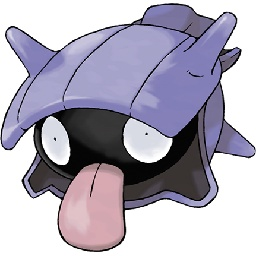

Generating prompts:  99%|█████████▉| 809/819 [4:57:24<03:34, 21.42s/it]

a very cute looking pokemon character with a big smile, paua shell, by René Magritte, black and blue and purple scheme, by Lichtenstein, dark concept art, 1792, recolored, dark cavern


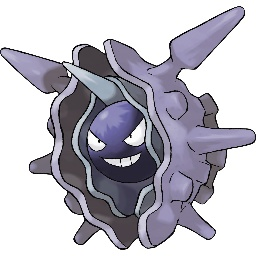

Generating prompts:  99%|█████████▉| 810/819 [4:57:41<03:01, 20.16s/it]

a cartoon black and white image of a black ball with white eyes, gengar, dark purple scheme, transparent goo, perfectly shaded face, looks like varicose veins, large fangs, very smoky, oval face, unmasked, fire type, spider webbed body


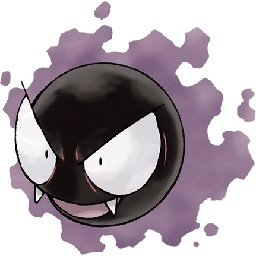

Generating prompts:  99%|█████████▉| 811/819 [4:58:02<02:43, 20.39s/it]

a cartoon image of a cat with a big grin on its face, gengar, wearing translucent veils, dark colour scheme, yelling furiously, upscaled to high resolution, ghostly mist, profile photo, slight evil smile, similar to pokemon, visibly angry, him, ghostly form


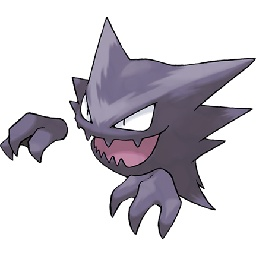

Generating prompts:  99%|█████████▉| 812/819 [4:58:25<02:27, 21.07s/it]

a pokemon character with a big smile on his face, with glowing purple eyes, background removed, in a halloween style, transparent, alluring and terrifying, dark skin, scary angry pose, ghostly mist, three dimensional shadowing


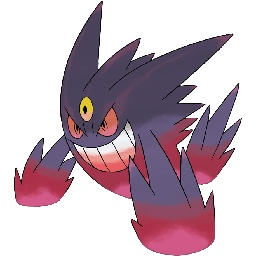

Generating prompts:  99%|█████████▉| 813/819 [4:58:43<02:00, 20.14s/it]

a cartoon image of a purple pokemon character with a big smile, scary angry pose, transparent background, ghostly, pagan, looking threatening, terrifying :7, dark scheme, a fat, gooey, sharp foccus


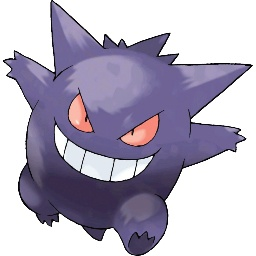

Generating prompts:  99%|█████████▉| 814/819 [4:59:02<01:38, 19.80s/it]

a drawing of a very large, gray creature with a long tail, brown cobble stones, giratina, wearing collar on neck, isometry, by Sōami, painted in high resolution, on a rock, composed of random limbs, metal gauntlet, artist rendition, recolored


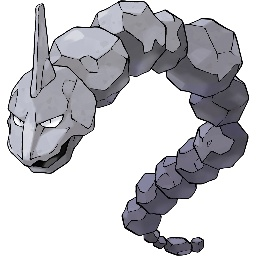

Generating prompts: 100%|█████████▉| 815/819 [4:59:25<01:22, 20.72s/it]

a cartoon image of a pokemon character with his arms up, an obese, surreal black and yellow, photoshopped, aliased, pure joy, look like someone is dancing, chad, normal proportions, cheerful, 2015, showing victory, yawning


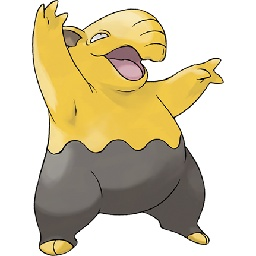

Generating prompts: 100%|█████████▉| 816/819 [4:59:47<01:03, 21.26s/it]

a yellow cat with a white collar and a white collar holding a silver medal, by Ken Sugimori, creepy pose, 1 8 0 2, troll, exploitable image, wearing many medallions, half - closed eyes, hexagonal ring, 2014, 1 8 3 4, medal, imaginative


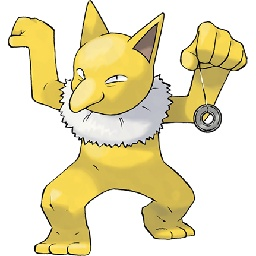

Generating prompts: 100%|█████████▉| 817/819 [5:00:10<00:43, 21.75s/it]

a cartoon crab with two claws and a large body, by Ken Sugimori, orange grey white, scary pose, recolored, derp, waporware, pc, fisting, chrome face symmetry, face morph, 3 4 5 3 1, aliased, cross-eyed, tap out, hands hidden, cataclysm, morph


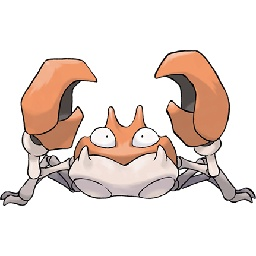

Generating prompts: 100%|█████████▉| 818/819 [5:00:41<00:24, 24.48s/it]

a cartoon image of a pokemon character laying on the ground, crab, full white beard, leaping with arms up, color palette is dark orange, terrifying in its weirdness, by Carl Eugen Keel, albino, in a menacing pose, profile photo, rotated, round-cropped, merged, tripod


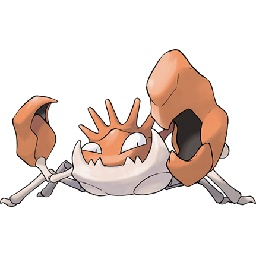

Generating prompts: 100%|██████████| 819/819 [5:01:05<00:00, 22.06s/it]





Generated 819 prompts and saved to ./desc.csv, enjoy!


In [ ]:
import os
import csv
from PIL import Image
from tqdm import tqdm
from IPython.display import clear_output, display

dir_path = "./images"  #{type:"string"}
prompt_mode = 'best'  #["best","fast","classic","negative"]
output_mode = 'desc.csv'  #["desc.csv","rename"]
max_filename_len = 128  #{type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = sorted([f for f in os.listdir(dir_path) if f.endswith('.jpg') or f.endswith('.png')],key=lambda x: int(x.split('/')[-1].split('.')[0])) if os.path.exists(dir_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(dir_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(dir_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(dir_path, file), os.path.join(dir_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = ('./desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {dir_path}")
